In [1]:
#importing keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Input, SpatialDropout1D
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [2]:
# DataFrame
import pandas as pd
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
#numpy
import numpy as np
#utility
import re
# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [4]:
#Load Dataset
df = pd.read_csv("./sentiment_data.csv")

In [5]:
vf = pd.read_csv("./Validation_data_competition.csv")

In [6]:
#Load Dataset
tf = pd.read_csv("./testset-competition.csv",)

In [7]:
tokenizer = Tokenizer(num_words=None, split=' ')
tokenizer.fit_on_texts(df['tweet_content'].values)
x = tokenizer.texts_to_sequences(df['tweet_content'].values)
x = pad_sequences(x, maxlen=20, padding='post')
print(x[54])

[   6 4324  367    5   92    8   79    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [8]:
y = tokenizer.texts_to_sequences(vf['tweet_content'].values)
y = pad_sequences(y, maxlen=20, padding='post')
print(y[3])

[225  16 873 310 165 420 281   1   1   4   1 836   1  44   1 923   1   3
   0   0]


In [9]:
from sklearn.model_selection import train_test_split
x_test = df.iloc[:,4:].values
y_test=vf.iloc[:,3:].values

In [10]:
batch_size = 16
epochs = 121

In [11]:
model = Sequential()
model.add(Embedding(14645, 256))
model.add(Dropout(0.4))
model.add(LSTM(32, dropout=0.4, recurrent_dropout=0.1))
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         3749120   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                36992     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 3,786,244
Trainable params: 3,786,244
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [13]:
history=model.fit(x, x_test,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(y, y_test))

C:\Users\Admin\anaconda3\envs\math_env\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9087 samples, validate on 2125 samples
Epoch 1/121
9087/9087 [==============================] - 41s 4ms/step - loss: 0.2718 - accuracy: 0.8884 - val_loss: 0.1865 - val_accuracy: 0.9468
Epoch 2/121
9087/9087 [==============================] - 35s 4ms/step - loss: 0.1479 - accuracy: 0.9544 - val_loss: 0.2044 - val_accuracy: 0.9367
Epoch 3/121
9087/9087 [==============================] - 34s 4ms/step - loss: 0.1025 - accuracy: 0.9687 - val_loss: 0.2185 - val_accuracy: 0.9292
Epoch 4/121
9087/9087 [==============================] - 33s 4ms/step - loss: 0.0742 - accuracy: 0.9762 - val_loss: 0.2867 - val_accuracy: 0.9189
Epoch 5/121
9087/9087 [==============================] - 32s 3ms/step - loss: 0.0523 - accuracy: 0.9834 - val_loss: 0.3377 - val_accuracy: 0.8971
Epoch 6/121
9087/9087 [==============================] - 31s 3ms/step - loss: 0.0390 - accuracy: 0.9873 - val_loss: 0.3704 - val_accuracy: 0.8979
Epoch 7/121
9087/9087 [==============================] - 31s 3ms/step - loss

In [14]:
print(history.history)

{'val_loss': [0.18651280375789195, 0.20436165588042315, 0.21852032488935133, 0.2867227174955256, 0.33770168514812693, 0.3703743183612824, 0.38603320923973533, 0.4263675129518789, 0.4637382424508824, 0.43105746694522745, 0.47842369085199693, 0.49663631281431986, 0.49112365371690075, 0.5537079381101272, 0.557616022372947, 0.5490935393782223, 0.5951231299849118, 0.629090545794543, 0.5701095193133635, 0.697801538157989, 0.6227721429607448, 0.6695033567652983, 0.6248598617385416, 0.7255977235331255, 0.8175201478267418, 0.7934379287204322, 0.7722958384853076, 0.7939424537858543, 0.7658849572434144, 0.7958747764089529, 0.7872209409212365, 0.846897828466752, 0.7769970179243999, 0.8909247061667197, 0.8565140017893385, 0.8721297319040578, 0.9537415460207883, 0.9365881305862875, 0.9993411732280956, 0.9092313514106414, 1.0608983679939719, 0.9571349797542481, 1.058256072752616, 0.9702885219034026, 0.9839300040532561, 1.005697256677291, 1.015297890144236, 0.9739901588646804, 1.0979088511186488, 1.10

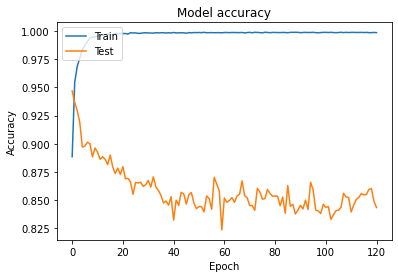

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

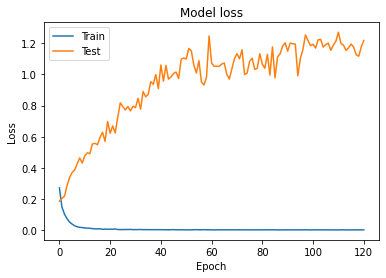

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
score= model.evaluate(y, y_test, verbose = 2)
print("Loss: %.2f" % score[0])
print("Accuracy: %.2f" % score[1])

Loss: 1.22
Accuracy: 0.84


In [18]:
prediction = model.predict(x)

In [19]:
print('Prediction value:', prediction[374])

Prediction value: [9.9987960e-01 9.6384436e-05 9.9991226e-01 4.9327646e-04]


In [20]:
z = tokenizer.texts_to_sequences(tf['tweet_content'].values)
z = pad_sequences(z, maxlen=22, padding='post')

In [21]:
pred=model.predict(z)
print('Prediction value:', pred[420])

Prediction value: [4.0690336e-02 1.5674639e-05 7.6927781e-06 2.3170620e-02]


In [22]:
for i in range(len(pred)):
    tf.at[i,'Harassment']=int(0)
    tf.at[i,'IndirectH']=int(0)
    tf.at[i,'PhysicalH']=int(0)
    tf.at[i,'SexualH']=int(0)
    if pred[i,0]>=0.4:
        tf.at[i,'Harassment']=1
        t=np.argmax(pred[i,1:])
        if t==2:
            tf.at[i,'SexualH']=int(1)
        elif t==1:
            tf.at[i,'PhysicalH']=int(1)
        elif t==0:
            tf.at[i,'IndirectH']=int(1)

In [23]:
tf[420:431]

,tweet_content,Harassment,IndirectH,PhysicalH,SexualH
420,naked girls fingering eachother beautiful girl...,0.0,0.0,0.0,0.0
421,naked girls vigina sexy swedish men pics,1.0,0.0,0.0,1.0
422,naked pillow fights nude girls in the farm,0.0,0.0,0.0,0.0
423,nanuqsaurus was a tyrannosaur from the late cr...,0.0,0.0,0.0,0.0
424,nasa commanded voyager to fire its thrusters f...,1.0,0.0,0.0,1.0
425,nature at its best in troms norway by tommy si...,1.0,0.0,0.0,1.0
426,nawww im the last person to criticize other pp...,0.0,0.0,0.0,0.0
427,nba young boy has a shitty ass personality his...,1.0,0.0,1.0,0.0
428,nba youngboy beat his gf ass blacked her eye a...,1.0,0.0,0.0,1.0
429,need a bitch who know algebra,1.0,0.0,0.0,1.0


In [24]:
model.save('./model.h5')

In [25]:
tf.to_csv('./testset-competition-result.csv')

In [26]:
from keras.utils import plot_model

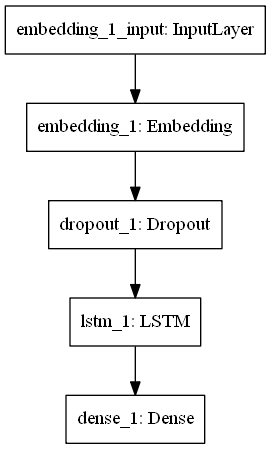

In [27]:
plot_model(model, to_file='model.png')